In [ ]:
from google.colab import files #opens a file picker to upload train.csv
uploaded = files.upload()
import pandas as pd
df = pd.read_csv("train.csv") #Reads uploaded dataset into DataFrame

Saving train.csv to train.csv


In [ ]:
df.head() #Displays first five rows for verification

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
import pandas as pd #Data handling
import numpy as np #Numerical operations
import seaborn as sns #Visualisation
import matplotlib.pyplot as plt #plotting
import re #Regex for DSL parsing

In [ ]:
# Fill missing Age with median (correct method)
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill missing Embarked with mode (correct method)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Encode categorical variables
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

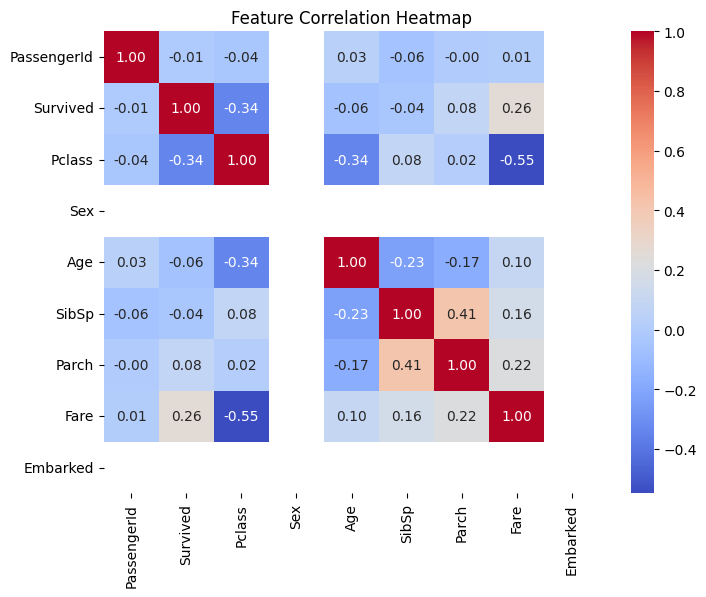

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix for numerical columns only
corr = df.corr(numeric_only=True)

# Plot heatmap of feature correlations
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
import re

def dsl_feature_selector(rule, corr_matrix):
    # Example rule: "select features where correlation > 0.1 and importance = high"
    # Extract correlation threshold from rule using regex
    match = re.search(r'correlation\s*>\s*(\d+\.\d+|\d+)', rule)
    if match:
        threshold = float(match.group(1))
        # Select features with correlation above threshold
        selected = corr_matrix['Survived'][abs(corr_matrix['Survived']) > threshold].index.tolist()
        return selected
    return []

# Example rule
rule = "select features where correlation > 0.1 and importance = high"
selected_features = dsl_feature_selector(rule, corr)
print("Selected Features:", selected_features)

Selected Features: ['Survived', 'Pclass', 'Fare']


/tmp/ipython-input-2748244336.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=df, ci=None)


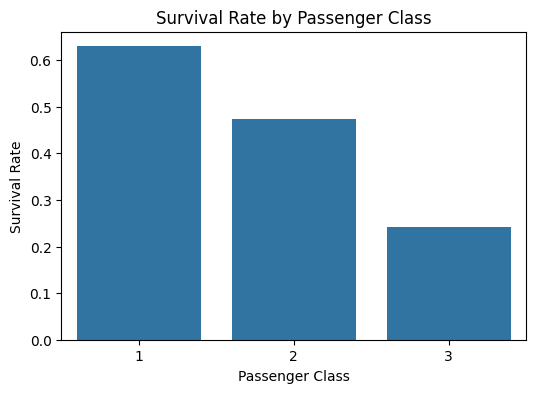

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Pclass', y='Survived', data=df, ci=None)
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.show()

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Pclass', y='Survived', data=df, errorbar=None)
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.savefig("class_distribution.png", dpi=300, bbox_inches='tight')
plt.close()

print("Plots saved as 'correlation_heatmap.png' and 'class_distribution.png'")

Plots saved as 'correlation_heatmap.png' and 'class_distribution.png'


In [ ]:
with open("selected_features.txt", "w") as f:
    f.write("Selected Features based on DSL Rule:\n")
    for feature in selected_features:
        f.write(f"{feature}\n")

print("Selected features saved in 'selected_features.txt'")

Selected features saved in 'selected_features.txt'


In [ ]:
!cat selected_features.txt

Selected Features based on DSL Rule:
Survived
Pclass
Fare


In [ ]:
from google.colab import files
files.download("selected_features.txt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download("selected_features.txt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download("correlation_heatmap.png")
files.download("class_distribution.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>